# Imports  
All of the libraries you need installed. Make sure to always run this at the beginning

In [1]:
import numpy as np # Amazing math library for python
import scipy.signal as signal # Additional signal processing library
import matplotlib.pyplot as plt # Convenient plotting library emulating the format of matlab
from ipywidgets import interact # Allow buttons and sliders on graphs
from IPython.display import Audio # Allow audio playing
from scipy.io.wavfile import read # Allow opening of .wav files

%matplotlib inline

# Workshop Examples

## How do computers represent sound?
A series (list, array, vector, etc.) of samples, x[n], taken at a fixed rate, fs.  
- x[n] = x[0] + x[1] + ... + x[n-1]

In [2]:
# We are going to generate a 250 Hz sine wave that is two seconds long and sampled at 2000 Hz

# Waveform parameters
fs = 5000 # Sampling rate in Hz
duration = 2 # length of wavefrom in seconds
total_samples = fs * duration # number of samples in entire waveform
freq = 250 # Frequency of the sine wave in Hz

# Generate the waveform
audio_time = np.linspace(0, duration, total_samples) # Generate the list of times in seconds that each sample is taken (used for plotting)
audio_radians = 2 * np.pi * freq * audio_time # Convert the frequency of the sinewave from Hz to radians
audio_amplitude = np.sin(audio_radians) # Generate the amplitude (instantaneous pressure) for each sample

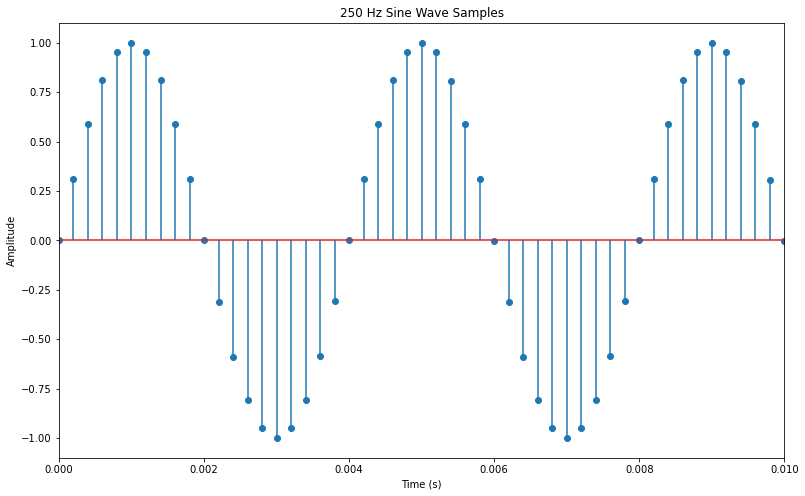

In [3]:
# Plot one hundreth of a second of the sinewave
plt.figure(figsize=(13,8)) # Create a new figure object, give it a size
plt.stem(audio_time, audio_amplitude) # time is x-axis, amplitude is y-axis
plt.title("250 Hz Sine Wave Samples")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.xlim([0, .01]) # plot only the times from 0 to one hundreth of a second
plt.show() # display the plot

### More on Sampling Rate  
The sampling rate of a sound must be at least twice the frequency of the highest frequency you want to represent on the computer. This is called the Nyquist frequency and is one of the biggest hurdles in computer music regardless of experience level.

In [ ]:
# First, let's see what this sine wave looks like plotted like a continuous waveform

# Waveform parameters
fs = 44100 # Hz
duration = 2 # Seconds
total_samples = fs * duration
freq = 250 # Hz

# Generate the waveform
audio_time = np.linspace(0, duration, total_samples) # Generate the list of times in seconds that each sample is taken (used for plotting)
audio_radians = 2 * np.pi * freq * audio_time # Convert the frequency of the sinewave from Hz to radians
audio_amplitude = np.sin(audio_radians) # Generate the amplitude (instantaneous pressure) for each sample

In [ ]:
# Plot one tenth of a second of the sinewave
plt.figure(figsize=(13,8)) # Create a new figure object, give it a size
plt.plot(audio_time, audio_amplitude) # time is x-axis, amplitude is y-axis
plt.title("250 Hz Sine Wave")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.xlim([0, .1]) # plot only the times from 0 to one hundreth of a second
plt.show() # display the plot

In [ ]:
# Allow the audio to be played
Audio(audio_amplitude, rate=fs)

In [ ]:
# Now let's see what happens if we have a 250 Hz sine wave, but sample it at 300 Hz

# Waveform parameters
fs = 300 # Hz
duration = 2 # Seconds
total_samples = fs * duration
freq = 250 # Hz

# Generate the waveform
audio_time = np.linspace(0, duration, total_samples) # Generate the list of times in seconds that each sample is taken (used for plotting)
audio_radians = 2 * np.pi * freq * audio_time # Convert the frequency of the sinewave from Hz to radians
audio_amplitude = np.sin(audio_radians) # Generate the amplitude (instantaneous pressure) for each sample

In [ ]:
# Plot the aliased sine wave
plt.figure(figsize=(13,8))
plt.plot(audio_time, audio_amplitude)
plt.title("Aliased 250 Hz Sine Wave")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.xlim([0, .1])
plt.show()

In [ ]:
# The audio player won't work at such a low sampling rate so we'll trick it into thinking it is at a regular audio rate
Audio(signal.resample(audio_amplitude, 44100*duration), rate=44100)

## Time Domain Representation  
The way you generally see audio plotted like above, or in recorders like audacity. What is often referred to as the waveform.  
Useful, but not always. Especially in the case of extracting human recognizable features. After all, our ears and brain divides up audio into different parts based on frequency

In [ ]:
# Let's see why time domain isn't always useful
# Look at this plot of a waveform. Can you tell what it is by looking at it?

# Load the audio file and calculate time in seconds
fs, audio_amplitude = read("speech_example.wav") 
audio_amplitude = audio_amplitude[:,0] # Array indexing to get one channel of stereo sound
audio_time = np.linspace(0, len(audio_amplitude) / fs, len(audio_amplitude))

# Plot the audio
plt.figure(figsize=(13,8))
plt.plot(audio_time, audio_amplitude)
plt.title("Time Domain Speech Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

In [ ]:
# Play audio. Can you tell what is said? Can you tell where different parts are in the waveform?
# WARNING: Turn down the volume before playing this audio, it can be very loud
Audio(audio_amplitude, rate=fs)

## Frequency Domain Representation
Using the FFT you can view the signal as a distribution of the amplitudes of the different frequencies that compose your sound. It is also important to note that the mathematics for this transformation results in you recieving a complex valued signal back. That is because the FFT contains two main pieces of information for you. The weighting of the frequencies (ie. the magnitdue spectrum) and the phase of the signal as a function of frequencies (this is a more advanced use so we will only briefly mention it).  
  
The FFT is also reversible through something called the inverse Fourier Transform (IFFT) and can exactly reconstruct your signal if nothing was done. This can actually be useful because certain operations in the time domain can be done faster in the frequency domain (ex. convolution).

In [ ]:
# 250 hz sine wave sampled at 44.1 kHz

# Waveform parameters
fs = 44100 # Sampling rate in Hz
duration = 2 # length of wavefrom in seconds
total_samples = fs * duration # number of samples in entire waveform
freq = 250 # Frequency of the sine wave in Hz

# Generate the waveform
audio_time = np.linspace(0, duration, total_samples) # Generate the list of times in seconds that each sample is taken (used for plotting)
audio_radians = 2 * np.pi * freq * audio_time # Convert the frequency of the sinewave from Hz to radians
audio_amplitude = np.sin(audio_radians) # Generate the amplitude (instantaneous pressure) for each sample

In [ ]:
# Full Frequency domain
# Contains negative frequencies, which is the complex conjugate of positive frequencies
# Generally not useful for audio or real-valued time series signals

# FFT and its parameters
n_fft = 2**16 # The number of points in the fft, essentially the number of sinusoids we want to decompose the signal into.
audio_fft = np.fft.fft(audio_amplitude, n_fft) # The complex frequency amplitudes of the signal
fft_freqs = np.fft.fftfreq(n_fft, d=1/fs) # The distribution of frequencies in Hz

# Plotting
xlim = [-500, 500] # Let's look at -500 to 500 Hz
plt.figure(figsize=(13,12))
plt.subplot(2,1,1)
plt.plot(fft_freqs, np.abs(audio_fft)) # Magnitude spectrum given by the absolute value of the fft
plt.title("Freq. Domain for 250 Hz Sine Wave")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.xlim(xlim)
# TODO: Currently phase plot makes no sense to me at all
plt.subplot(2,1,2)
plt.plot(fft_freqs, np.angle(audio_fft)) # Phase spectrum given by arctan(imag_val / real_val)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Phase (radians)")
plt.xlim(xlim)
plt.show()

In [ ]:
# Let's undo the FFT!
audio_ifft = np.fft.ifft(audio_fft) # Invserse FFT
new_time = [i * 2 / len(audio_ifft) for i in range(len(audio_ifft))] # Create a new array of time values for plotting since IFFT created more points

In [ ]:
# Plot the inverse FFT
plt.figure(figsize=(13,8))
plt.plot(new_time, np.real(audio_ifft))
plt.title("Inverse FFT 250 Hz Sine Wave")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.xlim([0, .1])
plt.show()

### What if I don't care about negative frequencies?  
The Real FFT is here for you.

In [ ]:
# Let's see the real FFT (plotting only positive frequencies) in action with a more complex waveform

# Generate a sinusoid of 3 different frequencies (100, 250, 500)
fs = 44100 # Hz
duration = 2 # Seconds
total_samples = fs * duration
freq1 = 100 # Hz
freq2 = 250 # Hz
freq3 = 500 # Hz

# Generate the waveform
audio_time = np.linspace(0, duration, total_samples)
audio_radians1 = 2 * np.pi * freq1 * audio_time
audio_radians2 = 2 * np.pi * freq2 * audio_time
audio_radians3 = 2 * np.pi * freq3 * audio_time
audio_amplitude = np.sin(audio_radians1) + np.sin(audio_radians2) + np.sin(audio_radians3)

In [ ]:
# Plot the 3 frequency sinusoid
plt.figure(figsize=(13,8))
plt.plot(audio_time, audio_amplitude)
plt.title("100 Hz, 250 Hz, 500 Hz Sinusoid")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.xlim([0, .1])
plt.show()

In [ ]:
# Compute the real FFT
n_fft = 2**16 # 
audio_fft = np.fft.rfft(audio_amplitude, n_fft) # Notice, the only difference is the r in fft.rfft
fft_freqs = np.fft.rfftfreq(n_fft, d=1/fs) # The distribution of frequencies in Hz

In [ ]:
# Plot the FFT. We expect to see peaks at 100, 250, and 500

xlim = [0, 750] # Let's look at 0 to 750 Hz
plt.figure(figsize=(13,12))
plt.subplot(2,1,1)
plt.plot(fft_freqs, np.abs(audio_fft)) # Magnitude spectrum given by the absolute value of the fft
plt.title("Freq. Domain for Multi-frequency Sinusoid")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.xlim(xlim)
plt.subplot(2,1,2)
plt.plot(fft_freqs, np.angle(audio_fft)) # Phase spectrum given by arctan(imag_val / real_val)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Phase (radians)")
plt.xlim(xlim)
plt.show()

## Time-Frequency Domain Representation

In [ ]:
# Let's see how the time-frequency domain is visualized (with a spectrogram) before breaking down how it is calculated

# Generate a sinusoid of 3 different frequencies (100, 250, 500)
fs = 44100 # Hz
duration = 2 # Seconds
total_samples = fs * duration
freq1 = 100 # Hz
freq2 = 250 # Hz
freq3 = 500 # Hz

# Generate the waveform
audio_time = np.linspace(0, duration, total_samples)
audio_radians1 = 2 * np.pi * freq1 * audio_time
audio_radians2 = 2 * np.pi * freq2 * audio_time
audio_radians3 = 2 * np.pi * freq3 * audio_time
audio_amplitude = np.sin(audio_radians1) + np.sin(audio_radians2) + np.sin(audio_radians3)

In [ ]:
# Plot the spectrogram
plt.figure(figsize=(13,8))
# matplotlib has a built in way to calculate and plot a spectrogram (nfft is points in fft window and noverlap is number of samples overlapped between windows)
plt.specgram(audio_amplitude, Fs=fs, NFFT=2**12, noverlap=2**11)
plt.title("Spectrogram of a Multi-Frequency Sinusoid")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.ylim([0, 1000])
plt.show()

In [ ]:
# Now let's see how it looks for a rapidly changing waveform, like the speech example from earlier

# Load the audio file and calculate time in seconds
fs, audio_amplitude = read("speech_example.wav") 
audio_amplitude = audio_amplitude[:,0] # Array indexing to get one channel of stereo sound
audio_time = np.linspace(0, len(audio_amplitude) / fs, len(audio_amplitude))

# Plot the spectrogram
plt.figure(figsize=(15,9))
plt.specgram(audio_amplitude, Fs=fs, NFFT=2**10, noverlap=2**9)
plt.title("Spectrogram of a Speech")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.ylim([0, 10000])
plt.show()

### Windows
The easiest way to divide your signal up is to just take evenly spaced slices of your input array. This is often referred to as rectangular or boxcar windowing. The issue is that this method can lead to discontinuities when the frequency domain of consecutive windows are laid together (like in a spectrogram). The solution is to multiply each window of the input signal by a smoothing, or windowing function. This causes the beginning and end of each window to approach zero which removes the discontinuities produced by boxcar windowing. To allow your signal to be fully represented in a series of windows this way requires to have windows overlap, commonly by 50% of the window length. If this is not done, data is lost because the windowing functions change the overall amplitude of the signal. When overlapping is used consecutive windows can be added together to reproduce the original signal. This is all best explained through images!

In [ ]:
# Let's generate a 250 Hz sine wave to use for this example

# Waveform parameters
fs = 44100 # Hz
duration = 2 # Seconds
total_samples = fs * duration # Samples
freq = 250 # Hz

# Generate the waveform
audio_time = np.linspace(0, duration, total_samples)
audio_radians = 2 * np.pi * freq * audio_time
audio_amplitude = np.sin(audio_radians)

In [ ]:
# Let's plot one rectangular window of this sinewave and the mathematically equivalent windowing function used

# Window parameters
window_len = 512 # Samples

# Generate the single window using array slicing
single_audio_window = audio_amplitude[0:window_len]
window_time = audio_time[0:window_len]

# Array slicing is mathematically equivilent to multiplying the input by a boxcar window
# The boxcar window is one from 0 to window_len-1 and zero everywhere else
boxcar_window = signal.boxcar(window_len)

plt.figure(figsize=(13,12))
plt.subplot(2,1,1)
plt.plot(window_time, single_audio_window)
plt.xlabel("Time(s)")
plt.ylabel("Amplitude")
plt.title("Windowed 250 Hz Sinewave")
plt.subplot(2,1,2)
plt.plot(window_time, boxcar_window)
plt.title("512 Sample Boxcar Window")
plt.xlabel("Time(s)")
plt.ylabel("Amplitude")
plt.show()

In [ ]:
# What about with a different windowing function, like Hanning?
# In this we'll show two windows of a sinewave

# Window parameters
window_len = 512 # Samples
han_window = np.hanning(window_len)

# Generate the single window using array slicing and multiply by the windowing function
first_audio_window = audio_amplitude[0:window_len] * han_window
second_audio_window = audio_amplitude[window_len:2*window_len] * han_window
first_window_time = audio_time[0:window_len]
second_window_time = audio_time[window_len:2*window_len]

# plot
plt.figure(figsize=(16,12))
plt.subplot(2,2,1)
plt.plot(first_window_time, first_audio_window)
plt.xlabel("Time(s)")
plt.ylabel("Amplitude")
plt.title("Window # 1")
plt.subplot(2,2,2)
plt.plot(second_window_time, second_audio_window)
plt.xlabel("Time(s)")
plt.ylabel("Amplitude")
plt.title("Window # 2")
plt.subplot(2,1,2)
plt.plot(first_window_time, han_window)
plt.title("512 Sample Hanning Window")
plt.xlabel("Time(s)")
plt.ylabel("Amplitude")
plt.show()

In [ ]:
# Let's look at how these two windows can't reconstruct the original signal
orig_two_windows = audio_amplitude[0:2*window_len]
two_window_time = audio_time[0:2*window_len]

# Make the windows the same lenght of two windows so we can add them
first_audio_window = audio_amplitude[0:window_len] * han_window
second_audio_window = audio_amplitude[window_len:2*window_len] * han_window
first_audio_window = np.append(first_audio_window, np.zeros(window_len))
second_audio_window = np.append(np.zeros(window_len), second_audio_window)

# Add the windows
summed_windows = first_audio_window + second_audio_window

# Plot
plt.figure(figsize=(16,12))
plt.subplot(2,1,1)
plt.plot(two_window_time, summed_windows)
plt.xlabel("Time(s)")
plt.ylabel("Amplitude")
plt.title("Summed Consecutive Windows")
plt.subplot(2,1,2)
plt.plot(two_window_time, orig_two_windows)
plt.xlabel("Time(s)")
plt.ylabel("Amplitude")
plt.title("Original Signal")
plt.show()

In [ ]:
# Next let's do the same thing, but with 50% overlap

# Window parameters
window_len = 512 # Samples
overlap = window_len // 2 # Samples
han_window = np.hanning(window_len)

# Generate the single window using array slicing and multiply by the windowing function
first_audio_window = audio_amplitude[0:window_len] * han_window
second_audio_window = audio_amplitude[window_len-overlap:2*window_len-overlap] * han_window
first_window_time = audio_time[0:window_len]
second_window_time = audio_time[window_len-overlap:2*window_len-overlap]

# Make the windows the proper length to add
first_audio_window = np.append(first_audio_window, np.zeros(window_len-overlap))
second_audio_window = np.append(np.zeros(window_len - overlap), second_audio_window)

# Add the windows
summed_windows = first_audio_window + second_audio_window
orig_two_windows = audio_amplitude[0:2*window_len-overlap]
two_window_time = audio_time[0:2*window_len-overlap]

# Plot
plt.figure(figsize=(16,12))
plt.subplot(2,1,1)
plt.plot(two_window_time, summed_windows)
plt.xlabel("Time(s)")
plt.ylabel("Amplitude")
plt.title("Summed Consecutive Windows")
plt.subplot(2,1,2)
plt.plot(two_window_time, orig_two_windows)
plt.xlabel("Time(s)")
plt.ylabel("Amplitude")
plt.title("Original Signal")
plt.show()

## Filtering
Filters are a great way to manipulate audio in useful ways. The most common ways you'll see filters used is to reduce noise or eliminate certain frequencies in a sound. Filters is a huge topic with mathematical design, what they are used for, and design considerations for different types of filters. This section will provide a very brief introduction into filter types, use, and most importantly using them in Python!  

When designing filters there are two types: Finite Impulse Response (FIR) and Infinite Impulse Response (IIR). Without going into the mathematics the main diffference between the two for us is that IIR filters are more computationally efficient, but can produce bad outputs for certain inputs and FIR is safe (ie. won't produce those bad outputs) but requires more computation to achieve the same accuracy as the IIR filters.  

The main parameters you will need to keep in mind for filtering are the number of taps, the order (for IIR), and the frequencies you want to filter. The number of taps is essentially the number of parameters the filter generates. Mathematically speaking it is the number of polynomial coefficients in the filter. The greater the number of taps, the greater the computation time and memory usage but also the better the accuracy of the filter. The order has a different mathematical meaning (the order multiplier of the polynomials), but a similar qualatative effect. Finally, the frequencies specified in the filter argument depend on the type of filter, but generally tell the function which frequencies you want to keep. More on this in the next section.

In [ ]:
# Here are the main versions of FIR and IIR filter functions I use in Python. These are by no means the only version of each, but can achieve all that is needed for basic filtering.

# FIR filter design
numtaps = 101 # Number of taps in the filter design
bands = [0, 200, 250, fs/2] # Frequencies that the desired parameter affects (Hz)
desired = [1, 1, 0, 0] # Gain at frequencies specified in bands. [1,0] means frequencies from [0,100) stay the same and frequencies [200, infinity) are removed
fs = 44100 # Hz
fir_filter = signal.firls(numtaps, bands, desired, fs=fs)

# IIR filter design
filter_order = 4 
cutoff = 250 # Hz
filter_type = 'lowpass' # The type of filter (more on this in the next section)
output_type = 'sos' # The output type for this type of filter (reccommended to always be sos, but other options exist for backwards compatability)
fs = 44100 # Hz
iir_filter = signal.butter(filter_order, cutoff, btype=filter_type, output=output_type, fs=fs)

In [ ]:
# Let's generate a multi-frequency sinuisoid to apply the filters on and see what happens

# Sinusoid Parameters
fs = 44100 # Hz
duration = 2 # Seconds
total_samples = fs * duration
freq1 = 100 # Hz
freq2 = 250 # Hz
freq3 = 500 # Hz

# Generate the waveform
audio_time = np.linspace(0, duration, total_samples)
audio_radians1 = 2 * np.pi * freq1 * audio_time
audio_radians2 = 2 * np.pi * freq2 * audio_time
audio_radians3 = 2 * np.pi * freq3 * audio_time
audio_amplitude = np.sin(audio_radians1) + np.sin(audio_radians2) + np.sin(audio_radians3)

In [ ]:
# Now let's apply the filters and plot the results
# Can you guess what the results will look like? (hint: both filters are doing generally the same thing)

# Apply the FIR filter
fir_filtered_audio = signal.lfilter(fir_filter, 1, audio_amplitude)
#fir_fft = np.fft.rfft()

# Apply the IIR filter
iir_filtered_audio = signal.sosfilt(iir_filter, audio_amplitude)

# Plot the filtered audio
xlim = [0, 0.1]
plt.figure(figsize=(16,12))
plt.subplot(3,1,1)
plt.plot(audio_time, audio_amplitude)
plt.xlim(xlim)
plt.xlabel("Time(s)")
plt.ylabel("Amplitude")
plt.title("Original Audio")
plt.subplot(3,1,2)
plt.plot(audio_time, fir_filtered_audio)
plt.xlim(xlim)
plt.xlabel("Time(s)")
plt.ylabel("Amplitude")
plt.title("FIR Filtered Audio")
plt.subplot(3,1,3)
plt.plot(audio_time, iir_filtered_audio)
plt.xlabel("Time(s)")
plt.ylabel("Amplitude")
plt.title("IIR Filtered Audio")
plt.xlim(xlim)
plt.subplots_adjust(hspace=.5)
plt.show()

In [ ]:
# Show freq domain and explain how that can ensure you design the filter you want :)
fir_freqs, fir_freq_response = signal.freqz(fir_filter, fs=fs)
iir_freqs, iir_freq_response = signal.sosfreqz(iir_filter, fs=fs)

# Plot
plt.figure(figsize=(16,12))
plt.subplot(2,1,1)
plt.plot(fir_freqs, np.abs(fir_freq_response))
plt.title("FIR Filter Frequency Response")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.subplot(2,1,2)
plt.plot(iir_freqs, np.abs(iir_freq_response))
plt.title("IIR Filter Frequency Response")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

# Interactive Examples

## Frequency Domain and FFT Parameters

In [ ]:
# Interactive real FFT

# This allows for controls
@interact(freq1_enable=True, freq2_enable=False, freq3_enable=False, freq4_enable=False, freq5_enable=False,
          freq1=(0,5000), freq2=(0,5000), freq3=(0,5000), freq4=(0,5000), freq5=(0,5000), 
          fft_len=(1,2**14))
def fft_slider(freq1_enable, freq2_enable, freq3_enable, freq4_enable, freq5_enable,
               freq1, freq2, freq3, freq4, freq5, 
               fft_len):
    # List all freqs
    freqs = []
    if freq1_enable: freqs.append(freq1)
    if freq2_enable: freqs.append(freq2)
    if freq3_enable: freqs.append(freq3)
    if freq4_enable: freqs.append(freq4)
    if freq5_enable: freqs.append(freq5)
    # Generate the audio
    fs = 44100 # Hz
    duration = 2 # Seconds
    total_samples = fs * duration # Samples
    audio_time = np.linspace(0, duration, total_samples)
    audio_amplitude = np.zeros(total_samples)
    for freq in freqs:
        audio_amplitude += np.sin(2 * np.pi * freq * audio_time)
    
    audio_fft = np.fft.rfft(audio_amplitude, n=fft_len)
    audio_ifft = np.fft.irfft(audio_fft)
    fft_freqs = np.fft.rfftfreq(fft_len, d=1/fs)
    xlim = [0, max(freqs) + 100]

    plt.figure(figsize=(16,7))
    plt.plot(fft_freqs, np.abs(audio_fft))
    plt.title("Real Frequency Domain")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.xlim(xlim)
    plt.show()

## Filters

In [ ]:
# Interactive FIR filter

@interact(freq1_enable=True, freq2_enable=False, freq3_enable=False, freq4_enable=False, freq5_enable=False,
          freq1=(1,5000), freq2=(1,5000), freq3=(1,5000), freq4=(1,5000), freq5=(1,5000), 
          filter_bands1=True, filter_bands2=False, filter_bands3=False, 
          band1_low_cutoff=(1,6000), band1_high_cutoff=(1,6000), 
          band2_low_cutoff=(1,6000), band2_high_cutoff=(1,6000), 
          band3_low_cutoff=(1,6000), band3_high_cutoff=(1,6000), 
          zero_freq_gain=(0,2), nyquist_freq_gain=(0,2),
          band1_low_gain=(0,2), band1_high_gain=(0,2),
          band2_low_gain=(0,2), band2_high_gain=(0,2),
          band3_low_gain=(0,2), band3_high_gain=(0,2),
          num_taps=(1,1301))
def fft_slider(freq1_enable, freq2_enable, freq3_enable, freq4_enable, freq5_enable,
               freq1, freq2, freq3, freq4, freq5, 
               filter_bands1, filter_bands2, filter_bands3,
               band1_low_cutoff, band1_high_cutoff, 
               band2_low_cutoff, band2_high_cutoff, 
               band3_low_cutoff, band3_high_cutoff,
               zero_freq_gain, nyquist_freq_gain,
               band1_low_gain, band1_high_gain, 
               band2_low_gain, band2_high_gain, 
               band3_low_gain, band3_high_gain,
               num_taps):
    # List all freqs
    freqs = []
    if freq1_enable: freqs.append(freq1)
    if freq2_enable: freqs.append(freq2)
    if freq3_enable: freqs.append(freq3)
    if freq4_enable: freqs.append(freq4)
    if freq5_enable: freqs.append(freq5)
    # Generate the audio
    fs = 44100 # Hz
    duration = 2 # Seconds
    total_samples = fs * duration # Samples
    audio_time = np.linspace(0, duration, total_samples)
    audio_amplitude = np.zeros(total_samples)
    for freq in freqs:
        audio_amplitude += np.sin(2 * np.pi * freq * audio_time)
    
    # Fitlering
    # We want the lowest and highest frequency to be set so the filter has certainty about endpoints and can accurately calculate coefficients
    filter_bands = [0]
    filter_gain = [zero_freq_gain]
    if filter_bands1: 
        filter_bands.append(band1_low_cutoff)
        filter_bands.append(band1_high_cutoff)
        filter_gain.append(band1_low_gain)
        filter_gain.append(band1_high_gain)
    if filter_bands2:
        filter_bands.append(band2_low_cutoff)
        filter_bands.append(band2_high_cutoff)
        filter_gain.append(band2_low_gain)
        filter_gain.append(band2_high_gain)
    if filter_bands3:
        filter_bands.append(band3_low_cutoff)
        filter_bands.append(band3_high_cutoff)
        filter_gain.append(band3_low_gain)
        filter_gain.append(band3_high_gain)
    filter_bands.append(fs/2)
    filter_gain.append(nyquist_freq_gain)
        
    fir_filter = signal.firls(numtaps, filter_bands, filter_gain, fs=fs)
    fir_freqs, fir_freq_response = signal.freqz(fir_filter, fs=fs)
    filtered_audio = signal.lfilter(fir_filter, 1, audio_amplitude)
    
    # Get Freq domain
    fft_len = 2**13
    audio_fft = np.fft.rfft(audio_amplitude, n=fft_len)
    audio_freqs = np.fft.rfftfreq(fft_len, d=1/fs)
    filt_audio_fft = np.fft.rfft(filtered_audio, n=fft_len)
    filt_audio_freqs = np.fft.rfftfreq(fft_len, d=1/fs)
    
    xlim = [20/np.max(freq), 2*20/np.max(freq)]
    xlim_freq = [0, max(np.max(freqs), np.max(cutoff)) + 1500]
    plt.figure(figsize=(16,20))
    plt.subplot(4,1,1)
    plt.plot(iir_freqs, np.abs(fir_freq_response))
    plt.title("Filter Frequency Response")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.xlim(xlim_freq)
    plt.subplot(4,2,3)
    plt.plot(audio_time, audio_amplitude)
    plt.title("Original Sound")
    plt.xlabel("Time(s)")
    plt.ylabel("Amplitude")
    plt.xlim(xlim)
    plt.subplot(4,2,4)
    plt.plot(audio_freqs, np.abs(audio_fft))
    plt.title("Original Audio Frequency Response")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.xlim(xlim_freq)
    plt.subplot(4,2,5)
    plt.plot(audio_time, filtered_audio)
    plt.title("Filtered Sound")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.xlim(xlim)
    plt.subplot(4,2,6)
    plt.plot(filt_audio_freqs, np.abs(filt_audio_fft))
    plt.title("Filtered Audio Frequency Response")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.xlim(xlim_freq)
    plt.ylim([0, np.max(np.abs(audio_fft))])
    plt.subplots_adjust(hspace=.5)
    plt.show()

In [ ]:
# Interactive IIR filter

@interact(freq1_enable=True, freq2_enable=False, freq3_enable=False, freq4_enable=False, freq5_enable=False,
          freq1=(1,5000), freq2=(1,5000), freq3=(1,5000), freq4=(1,5000), freq5=(1,5000), 
          filter_type=['lowpass', 'highpass', 'bandpass', 'bandstop'], filter_order=(1,8), low_cutoff=(0,6000), high_cutoff=(0,6000))
def fft_slider(freq1_enable, freq2_enable, freq3_enable, freq4_enable, freq5_enable,
               freq1, freq2, freq3, freq4, freq5, 
               filter_type, filter_order, low_cutoff, high_cutoff):
    # List all freqs
    freqs = []
    if freq1_enable: freqs.append(freq1)
    if freq2_enable: freqs.append(freq2)
    if freq3_enable: freqs.append(freq3)
    if freq4_enable: freqs.append(freq4)
    if freq5_enable: freqs.append(freq5)
    # Generate the audio
    fs = 44100 # Hz
    duration = 2 # Seconds
    total_samples = fs * duration # Samples
    audio_time = np.linspace(0, duration, total_samples)
    audio_amplitude = np.zeros(total_samples)
    for freq in freqs:
        audio_amplitude += np.sin(2 * np.pi * freq * audio_time)
    
    # Fitlering
    if filter_type == 'lowpass': cutoff = low_cutoff
    elif filter_type == 'highpass': cutoff = high_cutoff
    else: cutoff = [low_cutoff, high_cutoff]
    iir_filter = signal.butter(filter_order, cutoff, btype=filter_type, output='sos', fs=fs)
    iir_freqs, iir_freq_response = signal.sosfreqz(iir_filter, fs=fs)
    filtered_audio = signal.sosfilt(iir_filter, audio_amplitude)
    
    # Get Freq domain
    fft_len = 2**13
    audio_fft = np.fft.rfft(audio_amplitude, n=fft_len)
    audio_freqs = np.fft.rfftfreq(fft_len, d=1/fs)
    filt_audio_fft = np.fft.rfft(filtered_audio, n=fft_len)
    filt_audio_freqs = np.fft.rfftfreq(fft_len, d=1/fs)
    
    xlim = [20/np.max(freq), 2*20/np.max(freq)]
    xlim_freq = [0, max(np.max(freqs), np.max(cutoff)) + 1500]
    plt.figure(figsize=(16,20))
    plt.subplot(4,1,1)
    plt.plot(iir_freqs, np.abs(iir_freq_response))
    plt.title("Filter Frequency Response")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.xlim(xlim_freq)
    plt.subplot(4,2,3)
    plt.plot(audio_time, audio_amplitude)
    plt.title("Original Sound")
    plt.xlabel("Time(s)")
    plt.ylabel("Amplitude")
    plt.xlim(xlim)
    plt.subplot(4,2,4)
    plt.plot(audio_freqs, np.abs(audio_fft))
    plt.title("Original Audio Frequency Response")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.xlim(xlim_freq)
    plt.subplot(4,2,5)
    plt.plot(audio_time, filtered_audio)
    plt.title("Filtered Sound")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.xlim(xlim)
    plt.subplot(4,2,6)
    plt.plot(filt_audio_freqs, np.abs(filt_audio_fft))
    plt.title("Filtered Audio Frequency Response")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.xlim(xlim_freq)
    plt.ylim([0, np.max(np.abs(audio_fft))])
    plt.subplots_adjust(hspace=.5)
    plt.show()